### Basic Data Handling and Operations 

In [2]:
def find_peaks(array):
    N = len(array)
    peak = array[0]
    index = 0
    output = []

    for x in range(1, N):
        if array[x] * array[x - 1] > 0:
            if peak < 0 and array[x] < peak:
                peak = array[x]
                index = x
            if peak >= 0 and array[x] > peak:
                peak = array[x]
                index = x
        else:
            output.append((index, peak))
            peak = array[x]
            index = x

    output.append((index, peak))
    return output

# Example usage with the provided array
input_array = [1, 4, 2, -2, -9, 10, 2, 12, 2, -4, -4, -4, -4, 2, 6, 7]
result = find_peaks(input_array)
print(result)


[(1, 4), (4, -9), (7, 12), (9, -4), (15, 7)]


#### Handling with NaN Values

In [2]:
import datetime as dt
import yfinance as yf
import pandas as pd

C:\ProgramData\Anaconda3\envs\API\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\envs\API\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\API\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\API\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [13]:
## Indian stocks end with suffixs of .NS
stocks = ["AMZN", "MSFT", "FB", "GOOG"] ## For these tickers, we want data
start = dt.datetime.today()-dt.timedelta(3650) ## Want to get 30 days back data from today
end = dt.datetime.today()
cl_price = pd.DataFrame() # Empty dataframe which will be filled with closing prices for all the stocks
## Looking over tickers and creating a datafram with close prices
for ticker in stocks:
    cl_price[ticker] = yf.download(ticker, start, end)["Adj Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


In [14]:
cl_price.head()

,AMZN,MSFT,FB,GOOG
Date,,,,
2013-12-23,20.146000,30.836105,NaN,27.773397
2013-12-24,19.959999,31.223448,NaN,27.692204
2013-12-26,20.219500,31.526596,NaN,27.832178
2013-12-27,19.903999,31.400290,NaN,27.855591
2013-12-30,19.668501,31.400290,NaN,27.632925


In [15]:
## Filling nan values
# cl_price.fillna({'FB':0,'GOOG':1})
# cl_price.fillna(method='bfill', axis=1) #next values based the next column
cl_price.fillna(method='bfill', axis=0, inplace=True) #next values based the next row

In [16]:
#dropping NaN values
cl_price.dropna(axis=1,how='any', inplace=True)## Row will delete if axis=0 and if axis=1 column will delete

#### Basic Statistics

In [17]:
cl_price.mean()

AMZN     84.089578
MSFT    143.931042
GOOG     68.771022
dtype: float64

In [18]:
cl_price.std()

AMZN     51.385375
MSFT    102.084485
GOOG     37.184544
dtype: float64

In [21]:
cl_price.median()

AMZN     86.614502
MSFT    103.599808
GOOG     56.859751
dtype: float64

In [23]:
cl_price.describe()

,AMZN,MSFT,GOOG
count,2516.000000,2516.000000,2516.000000
mean,84.089578,143.931042,68.771022
std,51.385375,102.084485,37.184544
min,14.347500,29.455145,24.560070
25%,36.130625,49.492015,37.498875
50%,86.614502,103.599808,56.859751
75%,126.622501,238.788563,99.902502
max,186.570496,382.700012,150.709000


In [24]:
cl_price.head()

,AMZN,MSFT,GOOG
Date,,,
2013-12-23,20.146000,30.836105,27.773397
2013-12-24,19.959999,31.223448,27.692204
2013-12-26,20.219500,31.526596,27.832178
2013-12-27,19.903999,31.400290,27.855591
2013-12-30,19.668501,31.400290,27.632925


In [25]:
cl_price.tail()

,AMZN,MSFT,GOOG
Date,,,
2023-12-14,147.419998,365.929993,133.199997
2023-12-15,149.970001,370.730011,133.839996
2023-12-18,154.070007,372.649994,137.190002
2023-12-19,153.789993,373.260010,138.100006
2023-12-20,154.824997,375.769989,141.960007


In [27]:
daily_return=cl_price.pct_change()

In [28]:
daily_return.head()

,AMZN,MSFT,GOOG
Date,,,
2013-12-23,NaN,NaN,NaN
2013-12-24,-0.009233,0.012561,-0.002923
2013-12-26,0.013001,0.009709,0.005055
2013-12-27,-0.015604,-0.004006,0.000841
2013-12-30,-0.011832,0.000000,-0.007994


In [30]:
daily_return1=cl_price/cl_price.shift(-2)-1

In [31]:
daily_return1

,AMZN,MSFT,GOOG
Date,,,
2013-12-23,-0.003635,-0.021902,-0.002112
2013-12-24,0.002813,-0.005632,-0.005866
2013-12-26,0.028014,0.004022,0.007211
2013-12-27,-0.001780,-0.003207,-0.002061
2013-12-30,-0.011559,0.003498,-0.003288
...,...,...,...
2023-12-14,-0.043162,-0.018033,-0.029084
2023-12-15,-0.024839,-0.006778,-0.030847
2023-12-18,-0.004876,-0.008303,-0.033601


In [33]:
daily_return.mean() ## Higher daily return can be check

AMZN    0.001029
MSFT    0.001140
GOOG    0.000803
dtype: float64

#### Rolling Operations - Data in Motion

In [40]:
daily_return.rolling(window=10).mean()
daily_return.rolling(window=10).std()
daily_return.rolling(window=10).max()
daily_return.rolling(window=10).min()
daily_return.rolling(window=10).sum()
## Exponential operation
daily_return.ewm(com=10, min_periods=10).mean()

,AMZN,MSFT,GOOG
Date,,,
2013-12-23,NaN,NaN,NaN
2013-12-24,NaN,NaN,NaN
2013-12-26,NaN,NaN,NaN
2013-12-27,NaN,NaN,NaN
2013-12-30,NaN,NaN,NaN
...,...,...,...
2023-12-14,0.001590,-0.000950,-0.000909
2023-12-15,0.003018,0.000329,-0.000389
2023-12-18,0.005229,0.000770,0.001921


#### Visualization

array([[<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>]],
      dtype=object)

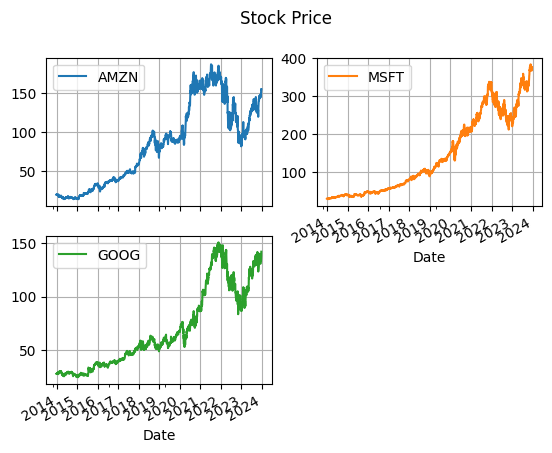

In [43]:
cl_price.plot(subplots=True,layout=(2,2),title="Stock Price", grid=True)

array([[<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>]],
      dtype=object)

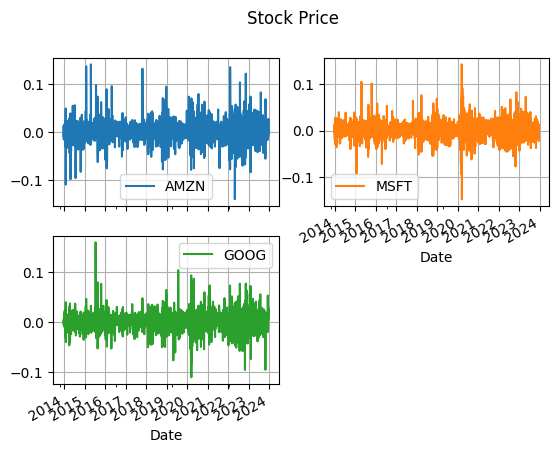

In [47]:
daily_return.plot(subplots=True,layout=(2,2),title="Stock Price", grid=True)

<AxesSubplot: xlabel='Date'>

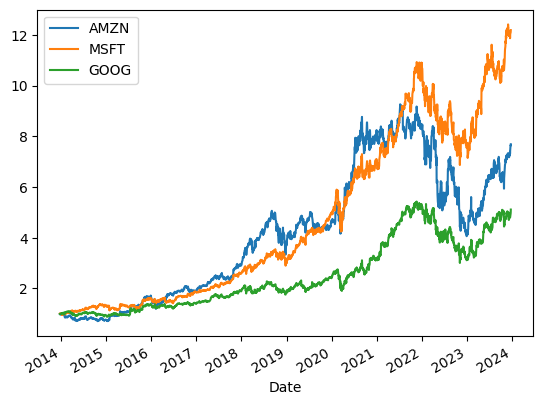

In [49]:
(1+daily_return).cumprod().plot() ### compunding return will give much better understanding of stock for a portfolio

In [50]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

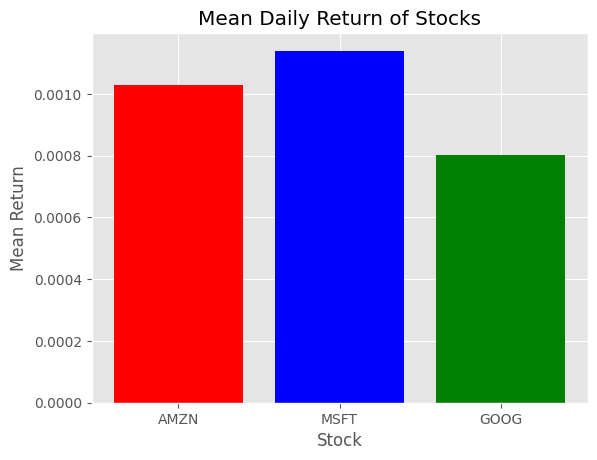

In [55]:
fig, ax = plt.subplots()
plt.style.available
plt.style.use("ggplot")
ax.set(title="Mean Daily Return of Stocks", xlabel="Stock", ylabel="Mean Return")
plt.bar(x=daily_return.columns, height=daily_return.mean(), color=['RED',"blue",'green'])